# Assignment7 </br>
### Orly Olbum </br>


## SC:py3, on pg. 464, number 1, but just do k-means and hierarchical clustering

Use a random number generator to produce several clouds of data in the real plain. At least two of your clouds should overlap. Then compare the clustering methods on your dataset.

*K-means*

In [1]:
# some requirements
import numpy as np
# pandas is a wrapper for numpy that includes dataframe
# makes python more r-like (for better and worse)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import copy
%matplotlib inline 
import random

In [2]:
# initialize random seed
np.random.seed(200)

x = []
for i in range(0, 100):
    n = random.randint(0, 100)
    x.append(n)

y = []
for i in range(0, 100):
    n = random.randint(0, 100)
    y.append(n)

# random data
df = pd.DataFrame({
    'x': x,
    'y': y
})

# set k
k = 4

# centroids
centroids = {
    j+1: [np.random.randint(0, 100), np.random.randint(0, 100)]
    for j in range(k)
}

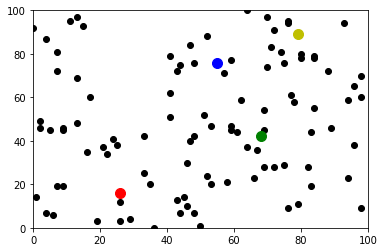

In [3]:
# plot
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], marker="o", s=100)
plt.xlim(0, 100)
plt.ylim(0, 100);

In [4]:
def assignment(df, centroids):
    # calc distance from every point to every centroid (vectorized by point)
    for j in centroids.keys():
        # sqrt((d - mu_{j0})^2 + (d_{2} - mu_{j1})^2)
        df['distance_from_{}'.format(j)] = (
            np.sqrt(
                (df['x'] - centroids[j][0]) ** 2
                + (df['y'] - centroids[j][1]) ** 2
            )
        )
    # columns to work with
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # new column in df that holds closest centroid (min distance)
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    # strip the prefix so we just have the j for closest centroid
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    # define a cluster color, based on centroid
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

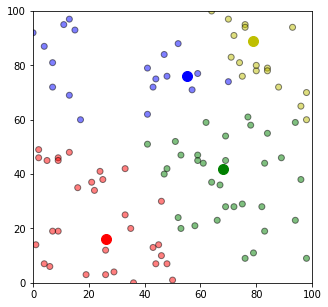

In [5]:
# run it!!
df = assignment(df, centroids)
# print(df.head())
# print("\n\n\n")

# visualize
fig = plt.figure(figsize=(5, 5))
# set alpha so we can tell centoid from data in cluster
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for j in centroids.keys():
    plt.scatter(*centroids[j], color=colmap[j], marker="o", s=100)
plt.xlim(0, 100)
plt.ylim(0, 100);

In [6]:
old_centroids = copy.deepcopy(centroids)

def update(k):
    # notice that I did not put centroids as an arg
    #  thus I am using the global centroids 
    for j in centroids.keys():
        # for each centroid, mu_{j} get th mean of its df column
        # df[df['closest']==i] subsets the vector by that rule (like filter)
        centroids[j][0] = np.mean(df[df['closest'] == j]['x'])
        centroids[j][1] = np.mean(df[df['closest'] == j]['y'])
    return centroids

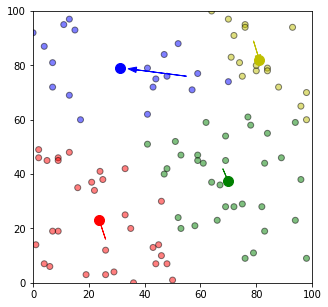

In [7]:
centroids = update(centroids)
fig = plt.figure(figsize=(5, 5))
ax = plt.axes() 
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for j in centroids.keys():
    plt.scatter(*centroids[j], color=colmap[j], marker="o", s=100)
plt.xlim(0, 100)
plt.ylim(0, 100)
for j in old_centroids.keys():
    old_x = old_centroids[j][0]
    old_y = old_centroids[j][1]
    dx = (centroids[j][0] - old_centroids[j][0]) * 0.75
    dy = (centroids[j][1] - old_centroids[j][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[j], ec=colmap[j]);

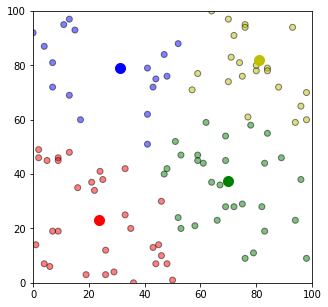

In [8]:
df = assignment(df, centroids)

fig = plt.figure(figsize=(5, 5))
# set alpha so we can tell centoid from data in cluster
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for j in centroids.keys():
    plt.scatter(*centroids[j], color=colmap[j], marker="o", s=100)
plt.xlim(0, 100)
plt.ylim(0, 100);

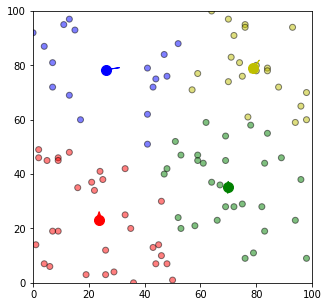

In [9]:
old_centroids = copy.deepcopy(centroids)
centroids = update(centroids)
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for j in centroids.keys():
    plt.scatter(*centroids[j], color=colmap[j], marker="o", s=100)
plt.xlim(0, 100)
plt.ylim(0, 100)
for j in old_centroids.keys():
    old_x = old_centroids[j][0]
    old_y = old_centroids[j][1]
    dx = (centroids[j][0] - old_centroids[j][0]) * 0.75
    dy = (centroids[j][1] - old_centroids[j][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[j], ec=colmap[j]);

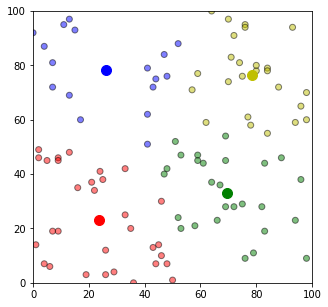

In [10]:
while True:
    closest_centroids = df[ 'closest'].copy(deep=True)
    # update step 
    centroids = update(centroids)
    # assignment step
    df = assignment(df, centroids)
    if closest_centroids. equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for j in centroids.keys():
    plt.scatter(*centroids[j], color=colmap[j], marker="o", s=100)
plt.xlim(0, 100)
plt.ylim(0, 100);

*Hierarchical*

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
# initialize random seed
np.random.seed(200)

x = []
for i in range(0, 100):
    n = random.randint(0, 100)
    x.append(n)

y = []
for i in range(0, 100):
    n = random.randint(0, 100)
    y.append(n)

# random data
df = pd.DataFrame({
    'x': x,
    'y': y
})

df

,x,y
0,76,94
1,47,100
2,85,92
3,36,64
4,81,52
...,...,...
95,81,31
96,51,72
97,47,71
98,7,50


In [15]:
linked = linkage(df, 'single')
linked

array([[ 23.        ,  72.        ,   1.        ,   2.        ],
       [  3.        ,  51.        ,   1.        ,   2.        ],
       [ 13.        ,  67.        ,   1.        ,   2.        ],
       [ 17.        , 100.        ,   1.41421356,   3.        ],
       [  7.        ,  80.        ,   1.41421356,   2.        ],
       [ 63.        ,  96.        ,   2.        ,   2.        ],
       [  0.        ,  94.        ,   2.23606798,   2.        ],
       [ 78.        , 105.        ,   2.23606798,   3.        ],
       [ 97.        , 107.        ,   2.23606798,   4.        ],
       [ 22.        ,  37.        ,   2.82842712,   2.        ],
       [ 29.        ,  65.        ,   3.        ,   2.        ],
       [ 85.        , 110.        ,   3.        ,   3.        ],
       [ 54.        , 104.        ,   3.60555128,   3.        ],
       [ 50.        , 108.        ,   3.60555128,   5.        ],
       [ 20.        ,  68.        ,   3.60555128,   2.        ],
       [ 56.        ,  76

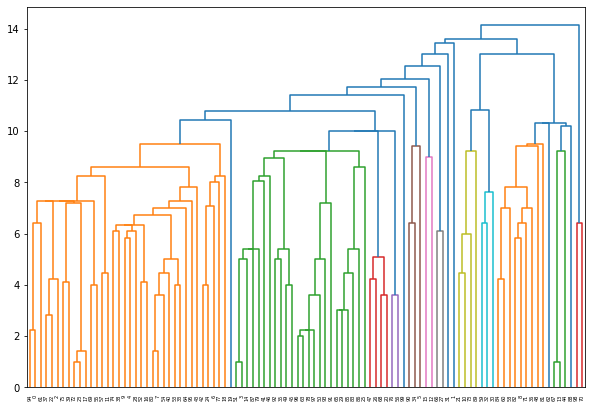

In [16]:
# dendrogram
labelList = list(range(df.shape[0]))
plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True);

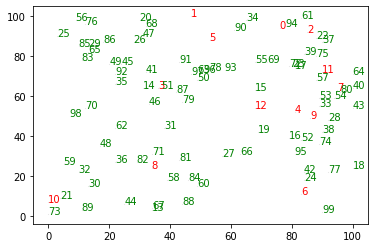

In [17]:
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'], color='k', s=.001)
for i in labelList:
    if i < 13:
        color="r"
    else:
        color="g"
    ax.annotate(i, (df['x'][i], df['y'][i]), color=color);